<a href="https://colab.research.google.com/github/Bibhas007/ML-Projects/blob/main/Logistic_Regression_BankCalls_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing required libariries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

In [2]:
dt =pd.read_excel(r"BankCalls.xlsx")
dt.isnull().sum()

age                   0
job                   0
marital               0
housing               0
loan                  0
month                 0
duration              0
campaign attending    0
Customer since        0
previous Savings      0
emp_var_rate          0
cons_price_idx        0
nr_employed           0
Output                0
dtype: int64

In [3]:
dt.head(2)

,age,job,marital,housing,loan,month,duration,campaign attending,Customer since,previous Savings,emp_var_rate,cons_price_idx,nr_employed,Output
0,44,blue-collar,married,yes,no,aug,210,1,999,0,1.4,93.444,5228.1,0
1,53,technician,married,no,no,nov,138,1,999,0,-0.1,93.200,5195.8,0


In [4]:
dt.describe()

,age,duration,campaign attending,Customer since,previous Savings,emp_var_rate,cons_price_idx,nr_employed,Output
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,5228.100000,1.000000


In [5]:
for col in dt.columns:
    print(col)

age
job
marital
housing
loan
month
duration
campaign attending
Customer since 
previous Savings
emp_var_rate
cons_price_idx
nr_employed
Output


In [6]:
dt.count()

age                   41188
job                   41188
marital               41188
housing               41188
loan                  41188
month                 41188
duration              41188
campaign attending    41188
Customer since        41188
previous Savings      41188
emp_var_rate          41188
cons_price_idx        41188
nr_employed           41188
Output                41188
dtype: int64

In [7]:
print(dt["job"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [8]:
print(dt["marital"].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [9]:
dt["Output"].value_counts()

0    36548
1     4640
Name: Output, dtype: int64

In [43]:
dt.shape

(41188, 14)

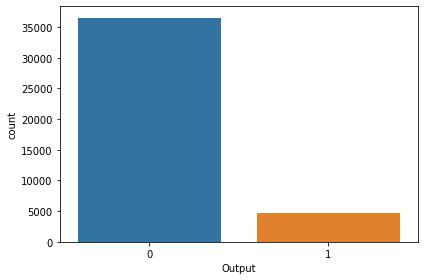

In [45]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd 
%matplotlib inline 
sns.countplot(x='Output',data=dt)  
plt.show()

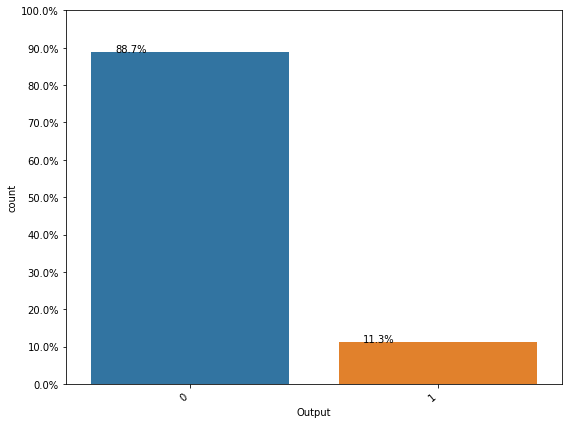

In [47]:
  plt.figure(figsize=(8,6))
  Y = dt["Output"]
  total = len(Y)*1.
  ax=sns.countplot(x="Output", data=dt)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [53]:
#Univariate Analysis
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = dt[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [59]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = dt[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="Output")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

Categorical variable : Job

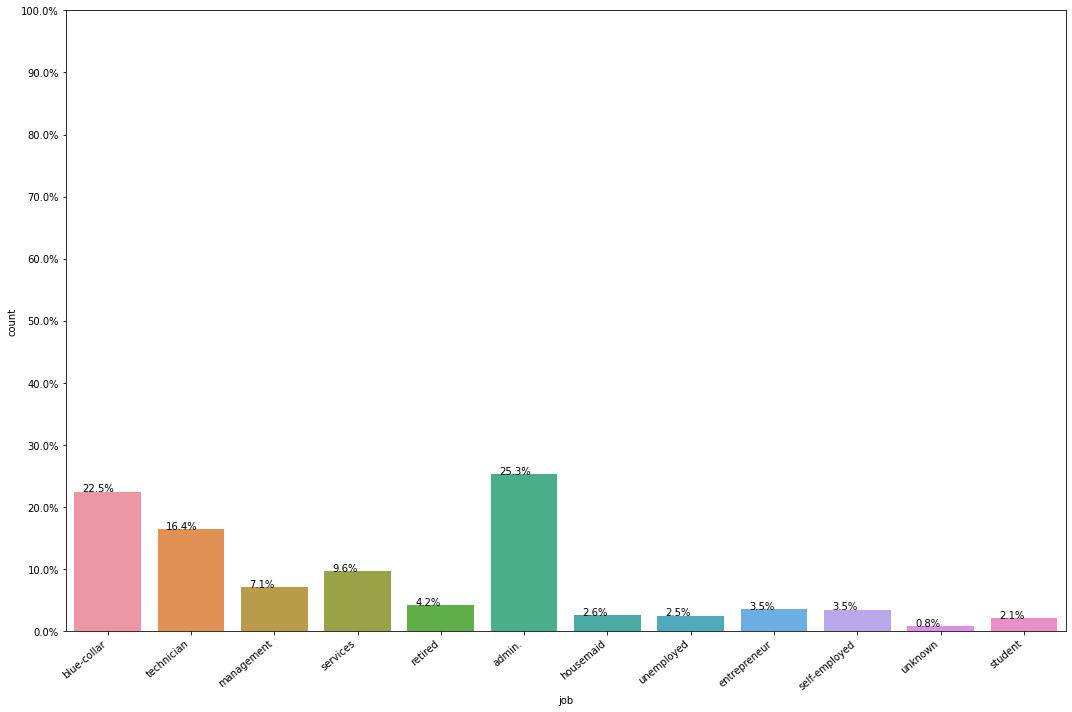

In [54]:
countplot("job", dt)

Most of the customers have jobs as "admin", "blue-collar" or "technician"


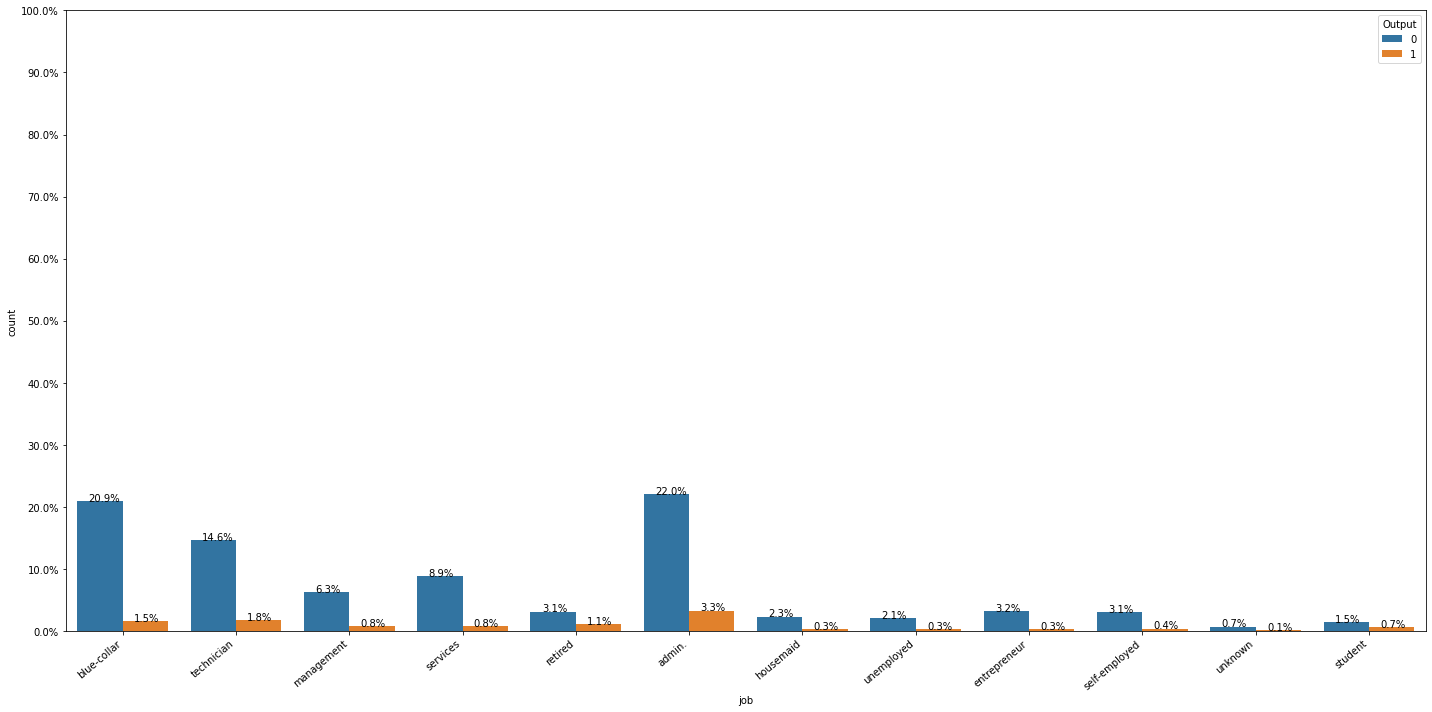

In [60]:
countplot_withY("job", dt)

Job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing.
Categorical feature : Marital

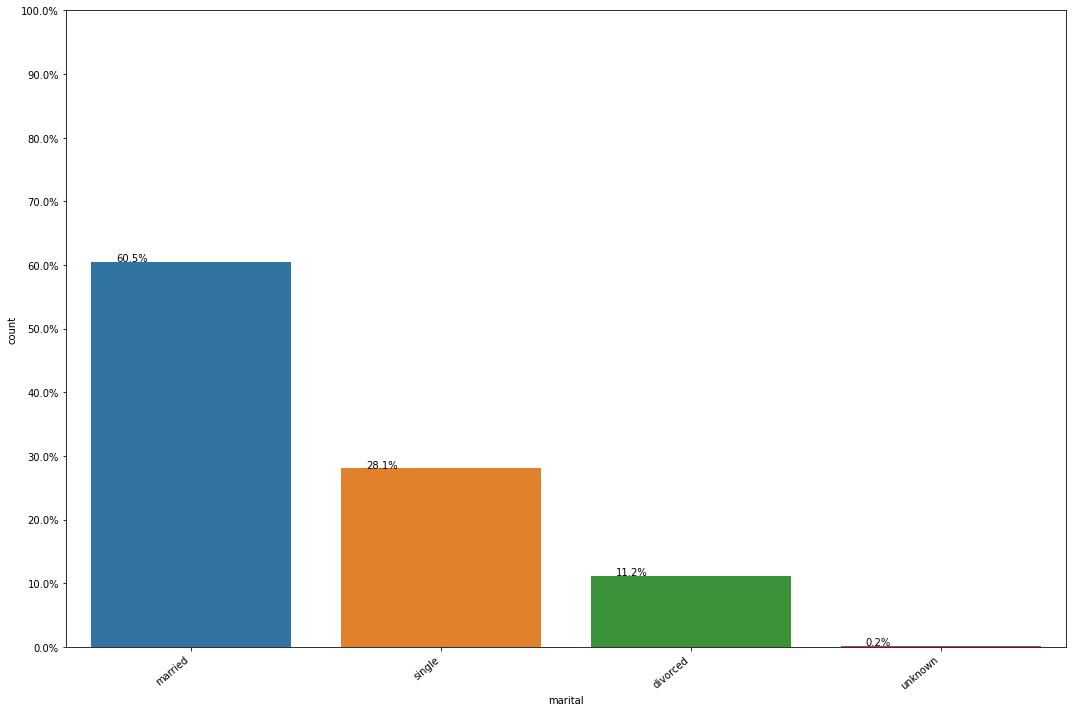

In [61]:
countplot("marital", dt)

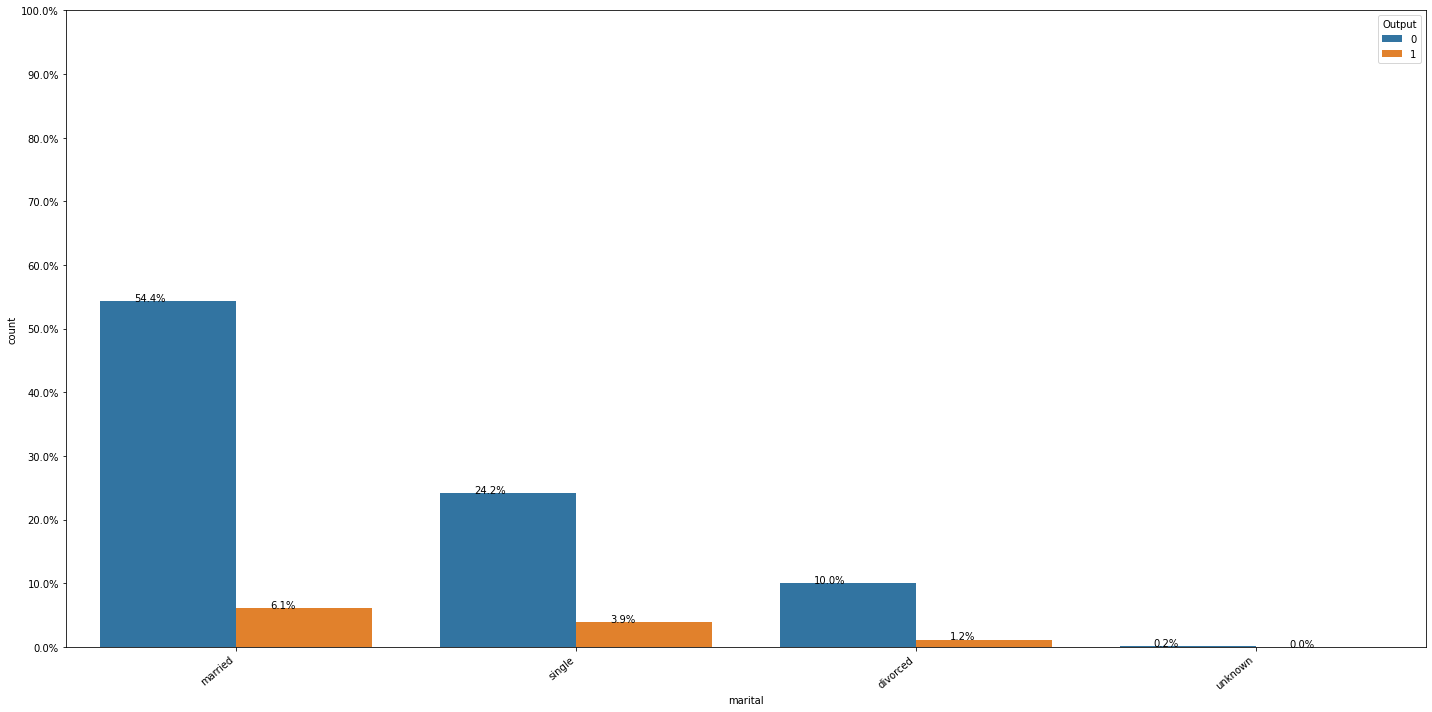

In [62]:
countplot_withY("marital", dt)

Categorical : housing

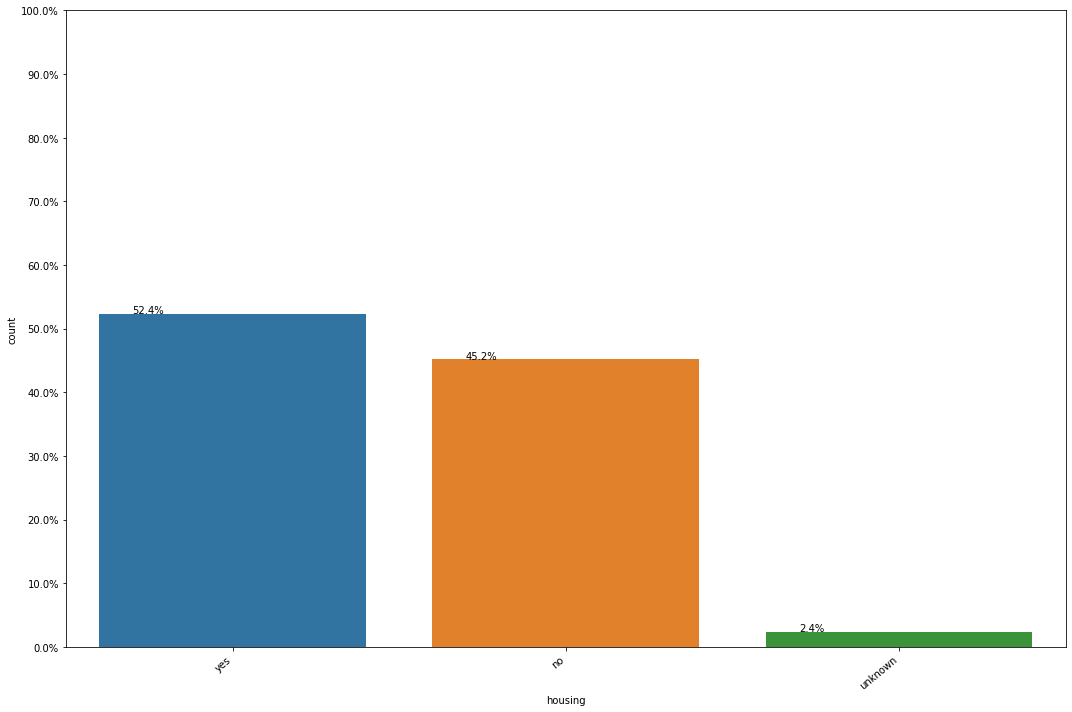

In [63]:
countplot("housing", dt)

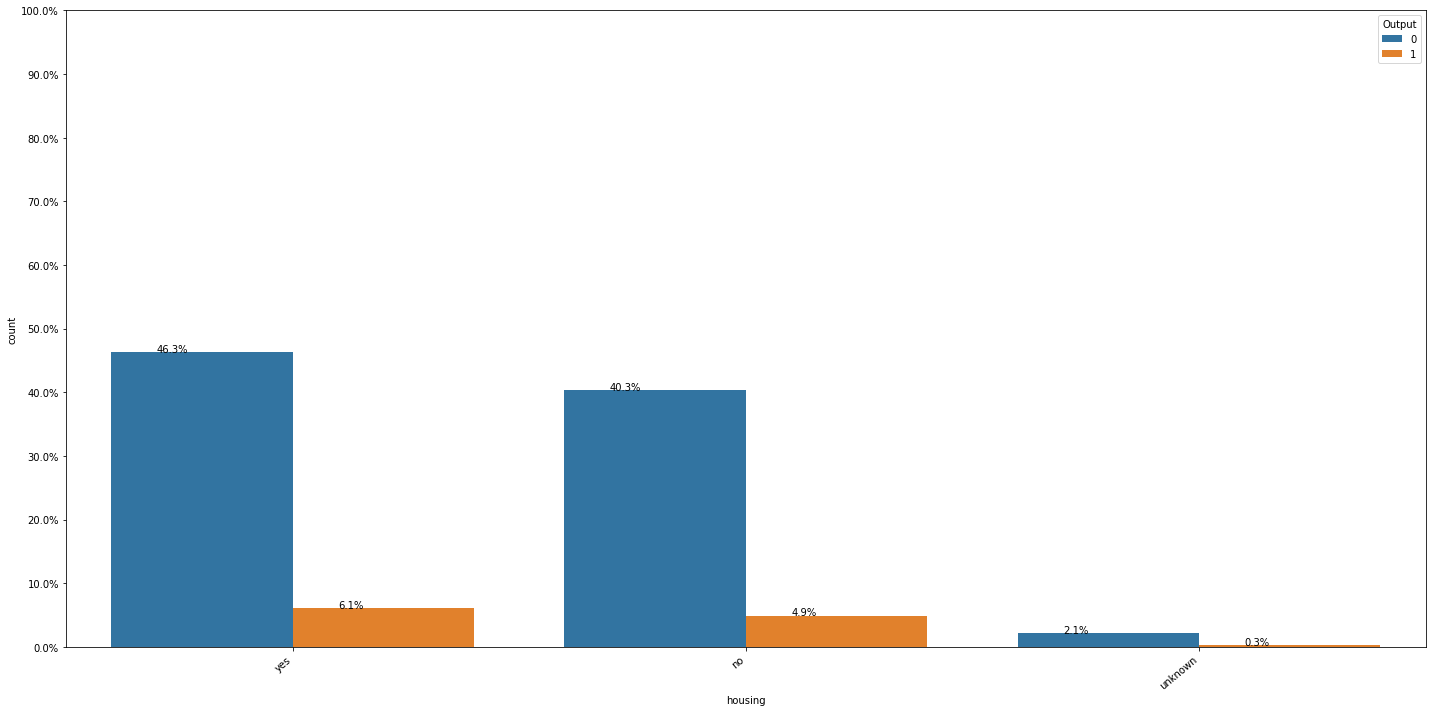

In [64]:
countplot_withY("housing", dt)

Categorical : loan

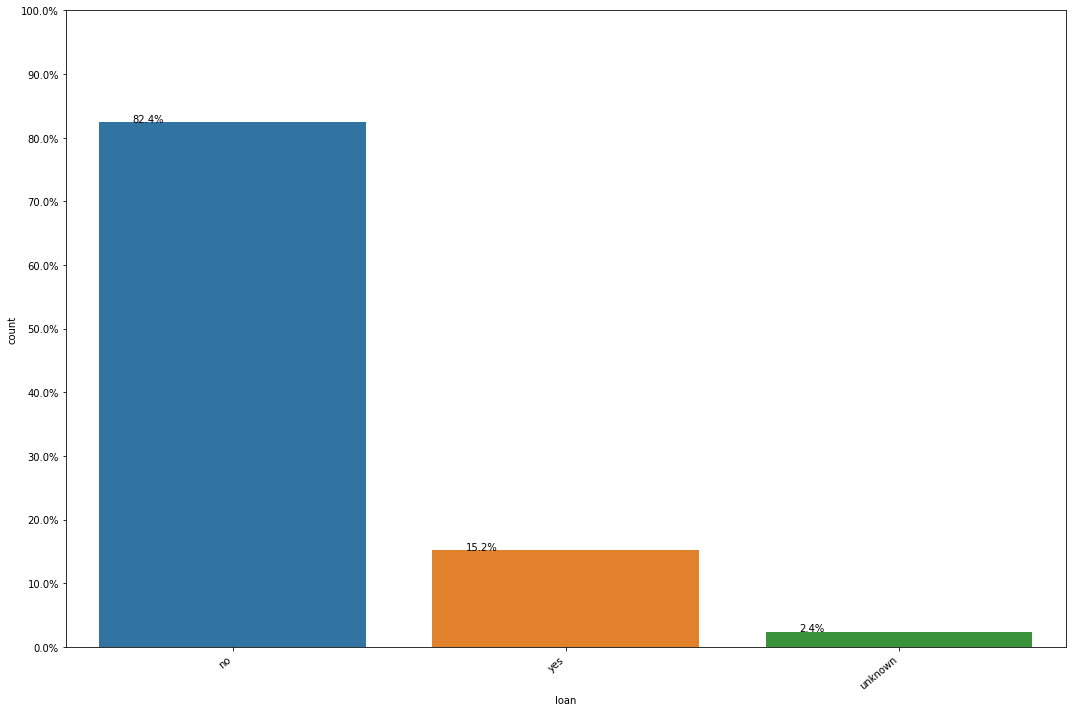

In [65]:
countplot("loan", dt)

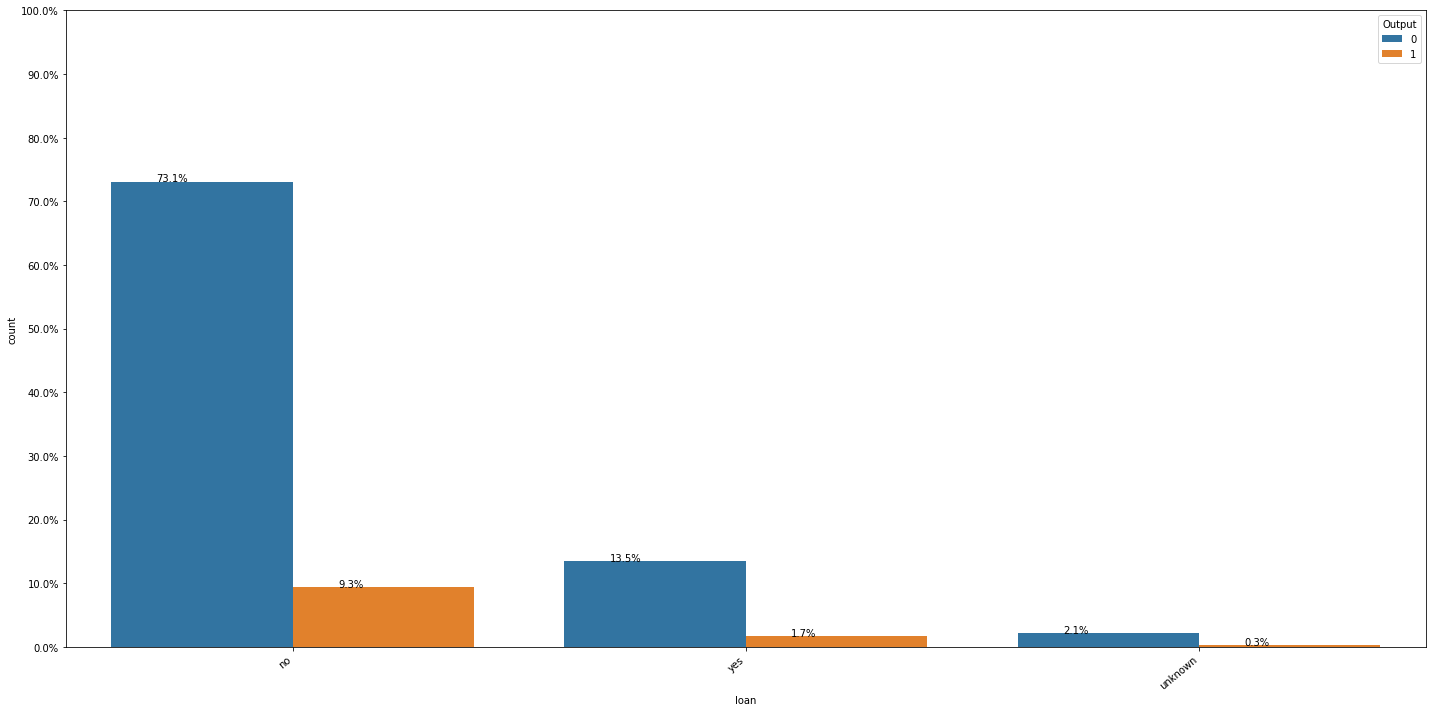

In [66]:
countplot_withY("loan", dt)

Categorical : month

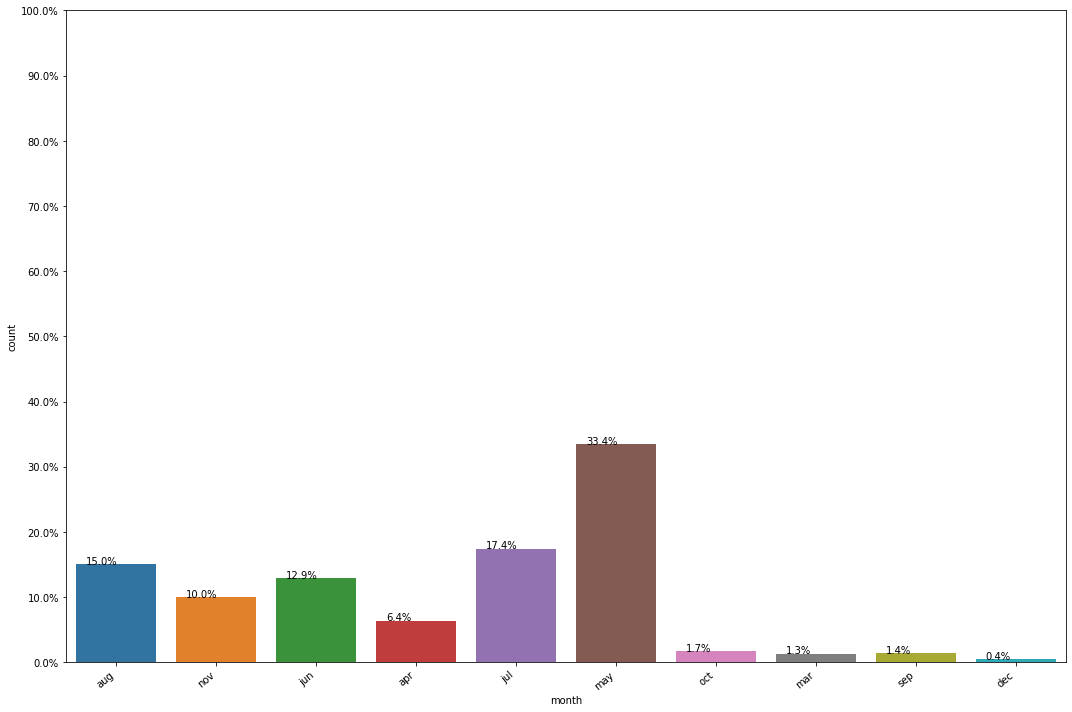

In [68]:
countplot("month", dt)

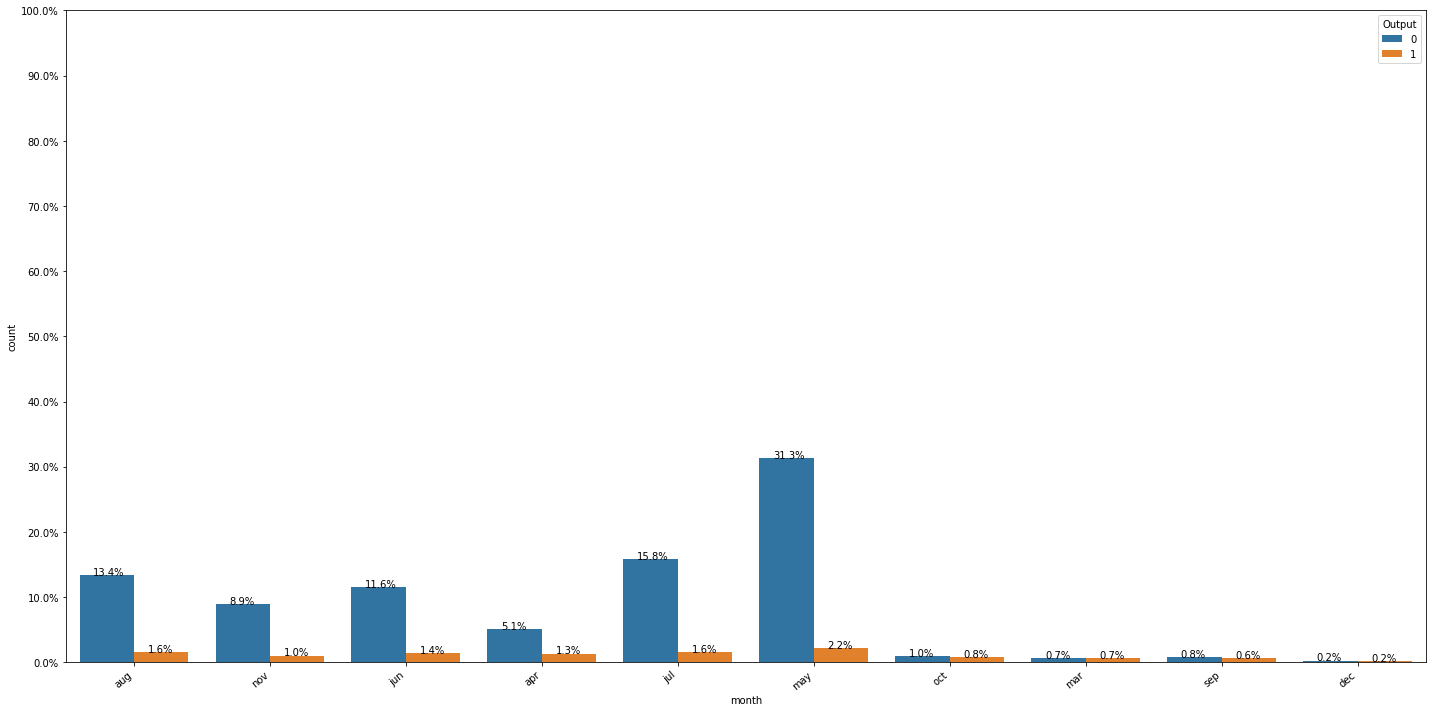

In [70]:
countplot_withY("month", dt)

numeric : duration

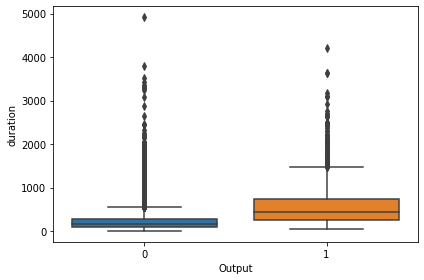

In [74]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="duration")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


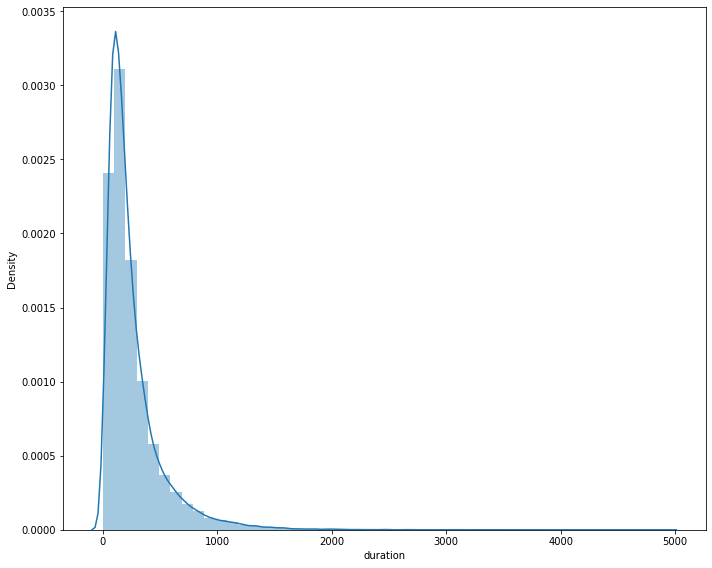

In [75]:
plt.figure(figsize=(10,8))
sns.distplot(dt["duration"])
plt.show()

Powerlaw distribution where most the values are very low and very few have high values

Numeric:Campaign

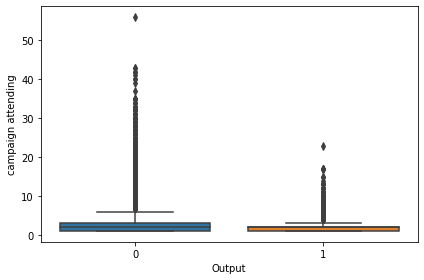

In [78]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="campaign attending")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


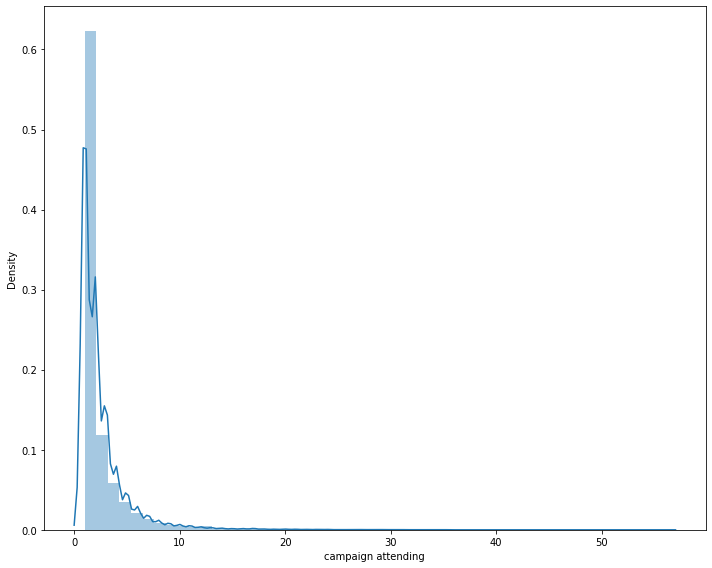

In [80]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(dt["campaign attending"])
plt.show()

In [76]:
dt.columns

Index(['age', 'job', 'marital', 'housing', 'loan', 'month', 'duration',
       'campaign attending', 'Customer since ', 'previous Savings',
       'emp_var_rate', 'cons_price_idx', 'nr_employed', 'Output'],
      dtype='object')

In [81]:
dt['previous Savings'].unique

<bound method Series.unique of 0        0
1        0
2        2
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: previous Savings, Length: 41188, dtype: int64>

Numeric : Previous Savings

In [84]:
dt["previous Savings"].unique()

array([0, 2, 1, 3, 4, 5, 7, 6])

In [86]:
dt["previous Savings"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous Savings, dtype: int64

In [87]:
dt[dt["Output"]==1]["previous Savings"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous Savings, dtype: int64

In [88]:
dt[dt["Output"]==0]["previous Savings"].value_counts()


0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous Savings, dtype: int64

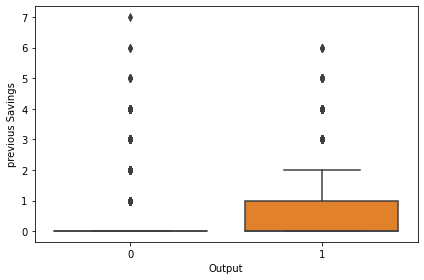

In [89]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="previous Savings")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


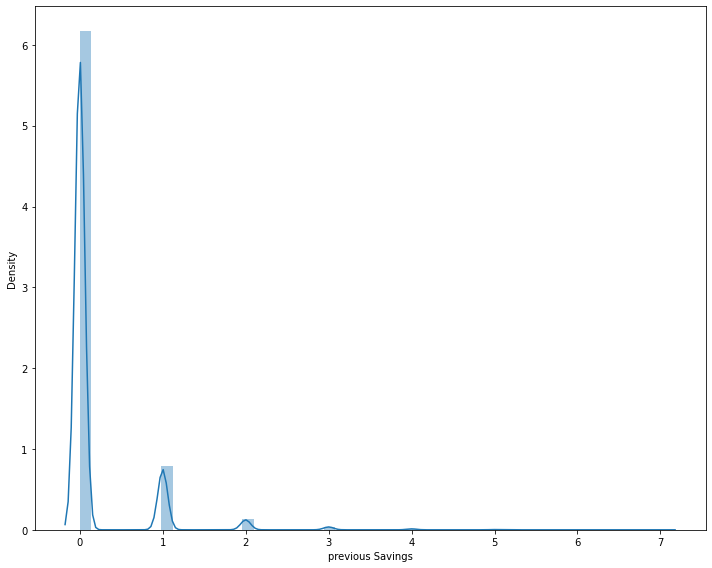

In [90]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(dt["previous Savings"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


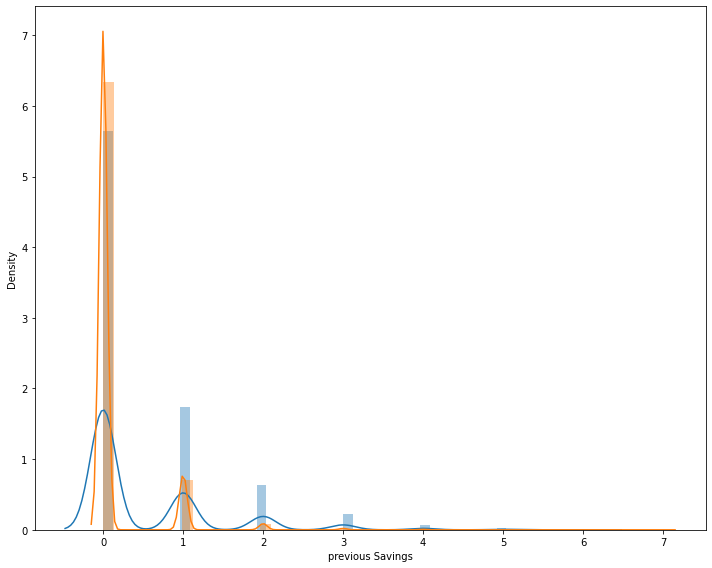

In [92]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(dt[dt["Output"]==1]["previous Savings"])
sns.distplot(dt[dt["Output"]==0]["previous Savings"])
plt.show()

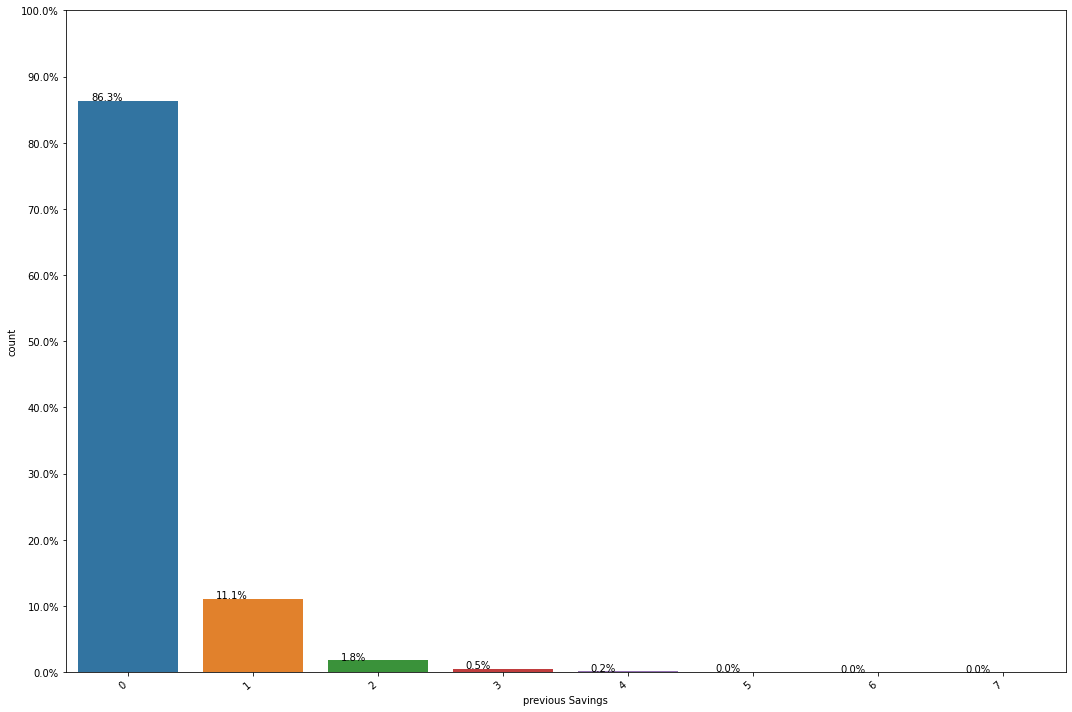

In [93]:
countplot("previous Savings", dt)

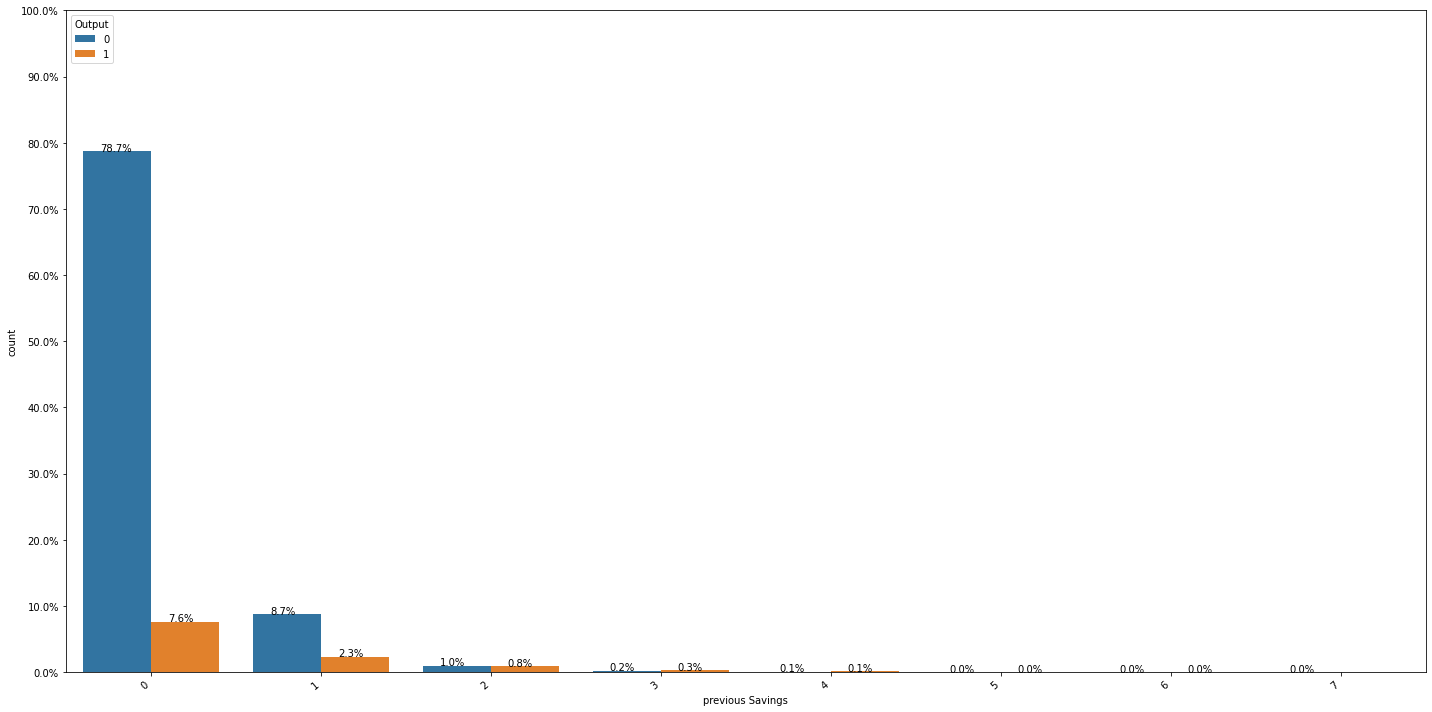

In [95]:
countplot_withY("previous Savings", dt)

In [96]:
dt.columns

Index(['age', 'job', 'marital', 'housing', 'loan', 'month', 'duration',
       'campaign attending', 'Customer since ', 'previous Savings',
       'emp_var_rate', 'cons_price_idx', 'nr_employed', 'Output'],
      dtype='object')

In [98]:
dt["emp_var_rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64

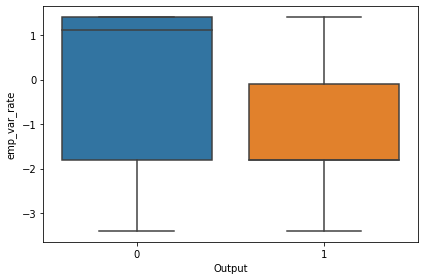

In [99]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="emp_var_rate")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


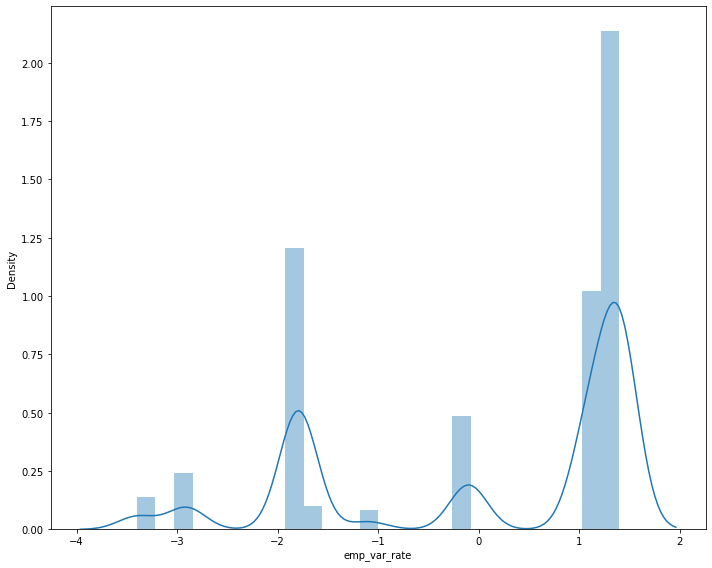

In [100]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(dt["emp_var_rate"])
plt.show()

Numeric : cons_price_idx

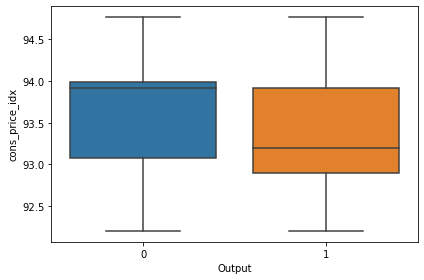

In [101]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="cons_price_idx")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


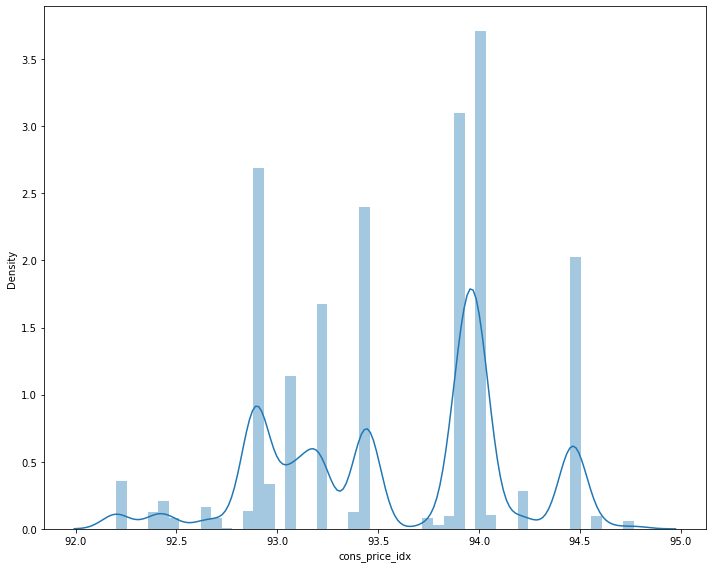

In [102]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(dt["cons_price_idx"])
plt.show()

Neumeric : cons_conf_idx 

In [103]:
dt.columns

Index(['age', 'job', 'marital', 'housing', 'loan', 'month', 'duration',
       'campaign attending', 'Customer since ', 'previous Savings',
       'emp_var_rate', 'cons_price_idx', 'nr_employed', 'Output'],
      dtype='object')

Numeric : nr_employed

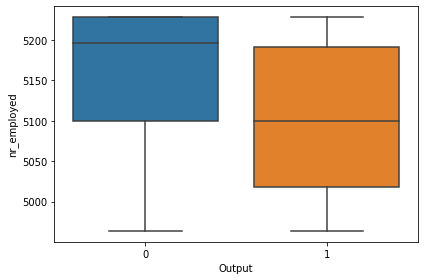

In [104]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="nr_employed")
plt.show()

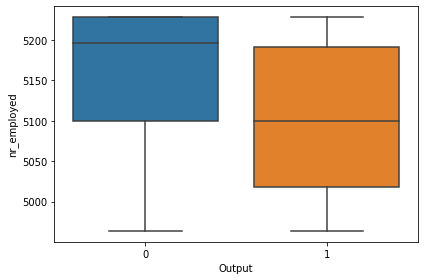

In [106]:
%matplotlib inline
sns.boxplot(data=dt, x="Output", y="nr_employed")
plt.show()

Correlation matrix of numerical features

Text(0.5, 1.05, 'Pearson correlation of Features')

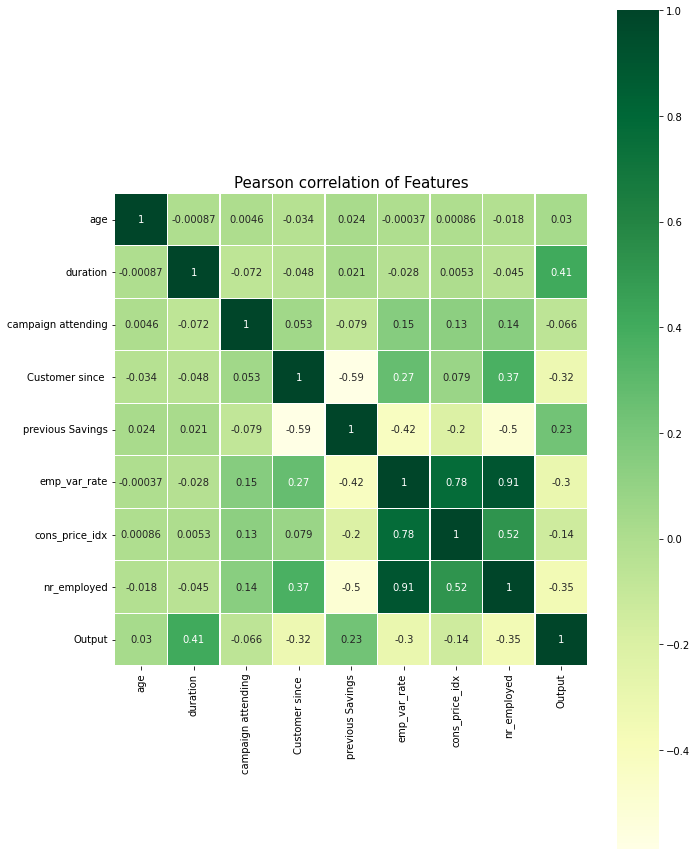

In [107]:
%matplotlib inline
corr = dt.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Numerical features which share a high correlation between them, example nr_employed and emp_var_rate corr is 0.91,emp_var_rate and nr_employed corr is 0.91, cons_price_idx and emp_var_rate corr is 0.78 etc. which is very high compared to the other features that we see in the heatmap.

Data Preprocessing

In [130]:
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [109]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   housing             41188 non-null  object 
 4   loan                41188 non-null  object 
 5   month               41188 non-null  object 
 6   duration            41188 non-null  int64  
 7   campaign attending  41188 non-null  int64  
 8   Customer since      41188 non-null  int64  
 9   previous Savings    41188 non-null  int64  
 10  emp_var_rate        41188 non-null  float64
 11  cons_price_idx      41188 non-null  float64
 12  nr_employed         41188 non-null  float64
 13  Output              41188 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 4.4+ MB


Dealing with duplicate data

In [110]:
data_dup = dt[dt.duplicated(keep="last")]
data_dup

,age,job,marital,housing,loan,month,duration,campaign attending,Customer since,previous Savings,emp_var_rate,cons_price_idx,nr_employed,Output
153,46,admin.,divorced,no,no,may,423,1,999,0,1.1,93.994,5191.0,0
579,45,blue-collar,married,no,no,may,135,1,999,0,1.1,93.994,5191.0,0
719,39,blue-collar,married,no,no,may,206,2,999,0,1.1,93.994,5191.0,0
1549,48,blue-collar,married,yes,no,may,88,2,999,0,-1.8,92.893,5099.1,0
1687,56,retired,married,no,no,may,88,2,999,0,1.1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34608,43,blue-collar,married,no,no,may,155,1,999,0,1.1,93.994,5191.0,0
35462,47,technician,divorced,yes,no,jul,43,3,999,0,1.4,93.918,5228.1,0
36283,35,admin.,married,yes,no,may,348,4,999,0,-1.8,92.893,5099.1,0
37214,39,admin.,married,no,no,nov,123,2,999,0,-0.1,93.200,5195.8,0


In [111]:
data_dup.shape


(93, 14)

In [115]:
data = dt.drop_duplicates()
data.shape

(41095, 14)

Separate inpedendent and target variables

In [117]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["Output"]
print("Shape of Y:", data_y.shape)

Shape of X: (41095, 13)
Shape of Y: (41095,)


In [118]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26300, 13)
X CV: (6576, 13)
X Test: (8219, 13)
Y Train: (26300,)
Y CV: (6576,)
Y Test: (8219,)


In [119]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [120]:
categorical_cols

['job', 'marital', 'housing', 'loan', 'month']

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [122]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Encoding for feature:  marital
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  month
Shape of train:  (26300, 40)
Shape of CV:  (6576, 40)
Shape of test:  (8219, 40)


In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26300 entries, 12998 to 27452
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 26300 non-null  int64  
 1   duration            26300 non-null  int64  
 2   campaign attending  26300 non-null  int64  
 3   Customer since      26300 non-null  int64  
 4   previous Savings    26300 non-null  int64  
 5   emp_var_rate        26300 non-null  float64
 6   cons_price_idx      26300 non-null  float64
 7   nr_employed         26300 non-null  float64
 8   job_admin.          26300 non-null  int64  
 9   job_blue-collar     26300 non-null  int64  
 10  job_entrepreneur    26300 non-null  int64  
 11  job_housemaid       26300 non-null  int64  
 12  job_management      26300 non-null  int64  
 13  job_retired         26300 non-null  int64  
 14  job_self-employed   26300 non-null  int64  
 15  job_services        26300 non-null  int64  
 16  

In [124]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

Modelling with "Duration" Column

The duration feature can not be included in the final model as it is highly correlated with the target variable

In [125]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration column:  0.9231165543621183


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [126]:
# Removing duration feature 

# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26300, 39)
The shape of the cv dataset:  (6576, 39)
The shape of the test dataset:  (8219, 39)


In [127]:
# without "duration" column
# X_train = X_train.drop("duration", axis=1)
# X_test = X_test.drop("duration", axis=1)

# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7805344994908475


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [128]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and class balancing:  0.7943197358027777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC for k =  1e-05 is 0.7577817989250573
AUC for k =  0.0001 is 0.7729386676159211
AUC for k =  0.001 is 0.7850260605501281
AUC for k =  0.01 is 0.788708156996137
AUC for k =  0.1 is 0.7897749695667269
AUC for k =  1 is 0.7893504418867311
AUC for k =  10 is 0.7898668187231649
AUC for k =  100 is 0.7901559897515678
AUC for k =  1000 is 0.7906991742365312


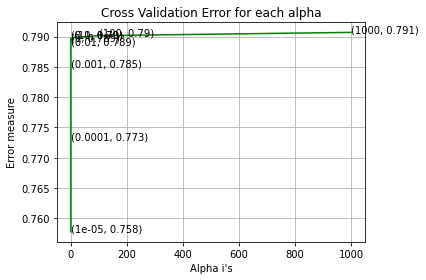

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


For values of best alpha =  1000 The train AUC is: 0.7855003220697175
For values of best alpha =  1000 The cross validation AUC is: 0.7906991742365312
For values of best alpha =  1000 The test AUC is: 0.7968463639097888


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [131]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))